In [2]:
import pandas as pd
import plotly.express as px
import json
from pathlib import Path
import geopandas as gpd
from IPython.display import JSON

In [3]:
p = Path("../examples/examples/tomkat-historic/")

In [5]:
modus_jsons = [] 
for file in p.glob("*.json"):
    with open(file) as f:
        modus_jsons.append(json.load(f))
        
        
modus_jsons = {"Events": [x for y in modus_jsons for x in y["Events"]]}
modus_jsons_events = modus_jsons["Events"]


def get_collection_date(event):
    return event["EventMetaData"].get("EventDate", None)

def flatten_soil_event_samples_to_df(event):   
    soil_samples = pd.json_normalize(event["EventSamples"]["Soil"]["SoilSamples"])
    soil_samples = soil_samples.explode("Depths")
    soil_samples = soil_samples.join(pd.DataFrame(soil_samples["Depths"].tolist()).explode("NutrientResults"))
    idx = soil_samples.index
    soil_samples = soil_samples.join(pd.DataFrame(soil_samples["NutrientResults"].tolist(), index=idx))
    soil_samples = soil_samples.drop(["Depths", "NutrientResults"], axis=1)
    soil_samples["DepthID"] = soil_samples["DepthID"].astype(int)
    soil_samples = soil_samples.merge(pd.DataFrame(event["EventSamples"]["Soil"]["DepthRefs"]), on="DepthID")
    soil_samples = soil_samples.rename({"Name": "DepthName"}, axis=1)
    return soil_samples


flattend_events = []
for idx, event in enumerate(modus_jsons_events):
    df = flatten_soil_event_samples_to_df(event)
    df["EventDate"] = get_collection_date(event)
    flattend_events.append(df)
    
flattend_data_df = pd.concat(flattend_events).drop(0, axis=1)
flattend_data_df = gpd.GeoDataFrame(flattend_data_df, geometry=gpd.GeoSeries.from_wkt(flattend_data_df["SampleMetaData.Geometry.wkt"]))
flattend_data_df = flattend_data_df.drop_duplicates()
flattend_data_df["lon"] = flattend_data_df.geometry.x
flattend_data_df["lat"] = flattend_data_df.geometry.y
flattend_data_df["Element Unit"] = flattend_data_df["Element"] + "(" + flattend_data_df["ValueUnit"] + ")"

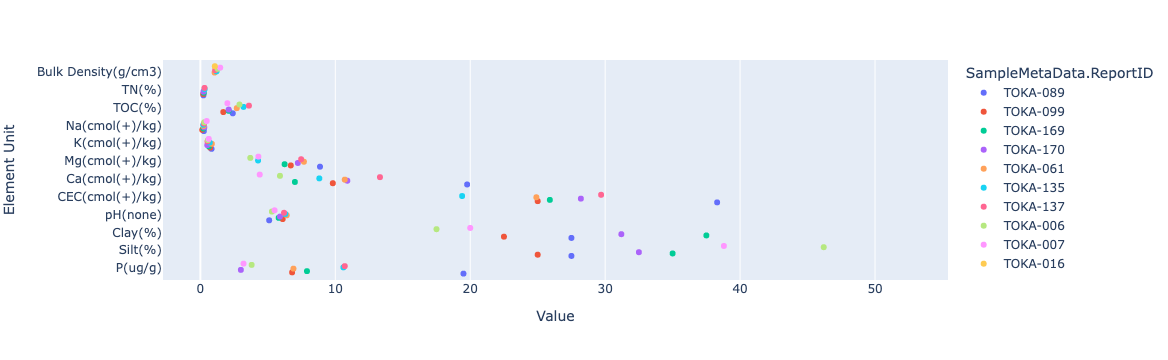

In [43]:

px.strip(flattend_data_df, y="Element Unit", x="Value", color="SampleMetaData.ReportID")


(2526, 16)

In [30]:
flattend_data_df.shape

(30590, 16)

In [55]:
idx= soil_samples["NutrientResults"].index 

,Element,ValueUnit,Value
0,P,ug/g,19.500000
0,NaN,%,45.000000
0,Silt,%,27.500000
0,Clay,%,27.500000
0,pH,none,5.100000
0,CEC,cmol(+)/kg,38.300000
0,Ca,cmol(+)/kg,19.770000
0,Mg,cmol(+)/kg,8.866667
0,K,cmol(+)/kg,0.828205
0,Na,cmol(+)/kg,0.256522


In [40]:
pd.DataFrame(soil_samples["NutrientResults"].tolist())

,Element,ValueUnit,Value
0,P,ug/g,19.500000
1,NaN,%,45.000000
2,Silt,%,27.500000
3,Clay,%,27.500000
4,pH,none,5.100000
5,CEC,cmol(+)/kg,38.300000
6,Ca,cmol(+)/kg,19.770000
7,Mg,cmol(+)/kg,8.866667
8,K,cmol(+)/kg,0.828205
9,Na,cmol(+)/kg,0.256522


In [28]:
soil_samples["NutrientResults"].

0    {'Element': 'P', 'ValueUnit': 'ug/g', 'Value':...
0                      {'ValueUnit': '%', 'Value': 45}
0    {'Element': 'Silt', 'ValueUnit': '%', 'Value':...
0    {'Element': 'Clay', 'ValueUnit': '%', 'Value':...
0    {'Element': 'pH', 'ValueUnit': 'none', 'Value'...
0    {'Element': 'CEC', 'ValueUnit': 'cmol(+)/kg', ...
0    {'Element': 'Ca', 'ValueUnit': 'cmol(+)/kg', '...
0    {'Element': 'Mg', 'ValueUnit': 'cmol(+)/kg', '...
0    {'Element': 'K', 'ValueUnit': 'cmol(+)/kg', 'V...
0    {'Element': 'Na', 'ValueUnit': 'cmol(+)/kg', '...
0    {'Element': 'TOC', 'ValueUnit': '%', 'Value': ...
0    {'Element': 'TN', 'ValueUnit': '%', 'Value': 0...
1    {'Element': 'P', 'ValueUnit': 'ug/g', 'Value':...
1                    {'ValueUnit': '%', 'Value': 52.5}
1    {'Element': 'Silt', 'ValueUnit': '%', 'Value':...
1    {'Element': 'Clay', 'ValueUnit': '%', 'Value':...
1    {'Element': 'pH', 'ValueUnit': 'none', 'Value'...
1    {'Element': 'CEC', 'ValueUnit': 'cmol(+)/kg', ...
1    {'Ele

In [70]:
soil_samples

,Depths,SampleMetaData.SampleNumber,SampleMetaData.ReportID,SampleMetaData.Geometry.wkt
0,"[{'DepthID': '1', 'NutrientResults': [{'Elemen...",0,TOKA-089,POINT(-122.3462180 37.2758779)
1,"[{'DepthID': '1', 'NutrientResults': [{'Elemen...",1,TOKA-099,POINT(-122.3394662 37.2740376)
2,"[{'DepthID': '1', 'NutrientResults': [{'Elemen...",2,TOKA-169,POINT(-122.3440091 37.2704573)
3,"[{'DepthID': '1', 'NutrientResults': [{'Elemen...",3,TOKA-170,POINT(-122.3440247 37.2686546)


In [56]:
for event in modus_jsons_events:
    print(get_collection_date(event))

2018-01-25
2018-01-28
2015-01-18
2018-02-05
2015-02-16
2016-08-09
2022-03-09
2016-08-09
2018-01-22
2018-01-16
2018-02-12
NA
2018-01-15
2018-01-11
2018-02-11
2022-03-13
2018-02-08
2018-01-17
2018-02-05
2018-01-17
2018-01-22
2018-01-23
2018-01-21
2018-01-29
2015-01-18
2018-01-21
2018-01-16
2018-01-29
2018-01-28
2018-02-14
2018-01-15
2016-08-09
2018-02-04
2018-02-08
2018-02-11
2018-01-25
2015-02-16
2018-02-14
2021-05-13
2018-02-04
2018-01-23
2018-01-11
2018-02-12


In [46]:
event

[{'LabMetaData': {'Reports': [{'ReportID': '1',
     'FileDescription': '2018_RMN 10-40cm_13'}]},
  'EventMetaData': {'EventDate': '2018-01-25', 'EventType': {'Soil': True}},
  'EventSamples': {'Soil': {'DepthRefs': [{'DepthUnit': 'cm',
      'StartingDepth': 10,
      'EndingDepth': 40,
      'Name': '10 to 40',
      'ColumnDepth': 30,
      'DepthID': 1}],
    'SoilSamples': [{'SampleMetaData': {'SampleNumber': '0',
       'ReportID': 'TOKA-089',
       'Geometry': {'wkt': 'POINT(-122.3462180 37.2758779)'}},
      'Depths': [{'DepthID': '1',
        'NutrientResults': [{'Element': 'P',
          'ValueUnit': 'ug/g',
          'Value': 19.5},
         {'ValueUnit': '%', 'Value': 45},
         {'Element': 'Silt', 'ValueUnit': '%', 'Value': 27.5},
         {'Element': 'Clay', 'ValueUnit': '%', 'Value': 27.5},
         {'Element': 'pH', 'ValueUnit': 'none', 'Value': 5.1},
         {'Element': 'CEC', 'ValueUnit': 'cmol(+)/kg', 'Value': 38.3},
         {'Element': 'Ca', 'ValueUnit': 'cmol

1

In [35]:
for m in modus_jsons:
    print(get_collection_date(m))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [15]:
JSON(modus_json)

<IPython.core.display.JSON object>